<a href="https://colab.research.google.com/github/shivi1224/Sugarcane-leaf-Disease-Prediction-using-SVM/blob/main/Sugarcane_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
#Data Visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

#Sharpening of images
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

#Preprocessing of Images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Buliding Model
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

#Accuracy
from sklearn.metrics import classification_report

In [3]:
data_dir = '/content/drive/MyDrive/sugarcaneDisease/SugarcaneLeafDiseaseDataset'
categories = os.listdir(data_dir)

In [4]:
categories=sorted(categories)
print(categories)

['Healthy', 'Mosaic', 'RedRot', 'Rust', 'Yellow']


In [5]:
labels=[i for i in range(len(categories))]
labels

[0, 1, 2, 3, 4]

In [6]:
label_dict=dict(zip(categories, labels))
label_dict

{'Healthy': 0, 'Mosaic': 1, 'RedRot': 2, 'Rust': 3, 'Yellow': 4}

In [7]:
data_list=[] #data_list- storing the images
labels_list=[] #label_list - storing the class labels

In [8]:
data1="/content/drive/MyDrive/sugarcaneDisease/SugarcaneLeafDiseaseDataset/Healthy"
data2="/content/drive/MyDrive/sugarcaneDisease/SugarcaneLeafDiseaseDataset/Mosaic"
data3="/content/drive/MyDrive/sugarcaneDisease/SugarcaneLeafDiseaseDataset/RedRot"
data4="/content/drive/MyDrive/sugarcaneDisease/SugarcaneLeafDiseaseDataset/Rust"
data5="/content/drive/MyDrive/sugarcaneDisease/SugarcaneLeafDiseaseDataset/Yellow"
count_healthy=0
count_mosaic=0
count_redrot=0
count_rust=0
count_yellow=0


In [9]:
for i in os.listdir(data1):
        img_path=os.path.join(data1, i)
        count_healthy=count_healthy+1

In [10]:
for i in os.listdir(data2):
        img_path=os.path.join(data2, i)
        count_mosaic=count_mosaic+1

In [11]:
for i in os.listdir(data3):
        img_path=os.path.join(data2, i)
        count_redrot=count_redrot+1

In [12]:
for i in os.listdir(data4):
        img_path=os.path.join(data2, i)
        count_rust=count_rust+1

In [13]:
for i in os.listdir(data5):
        img_path=os.path.join(data2, i)
        count_yellow=count_yellow+1

In [14]:
count_healthy,count_mosaic,count_redrot,count_rust,count_yellow

(522, 462, 518, 514, 505)

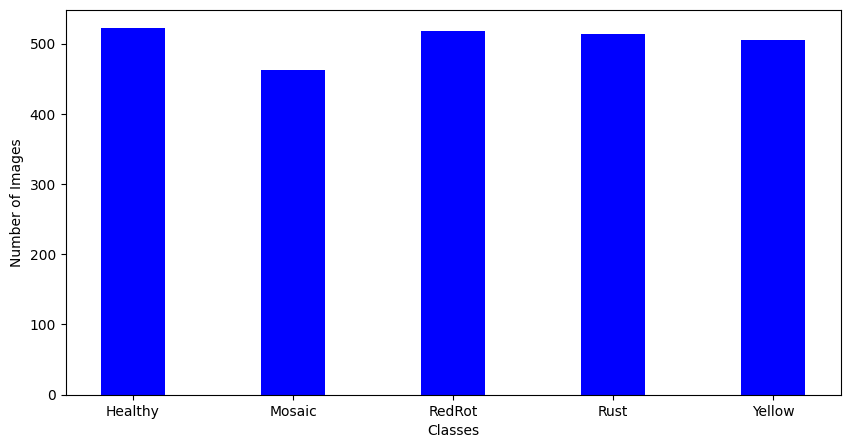

In [15]:
fig = plt.figure(figsize = (10, 5))
classes=["Healthy","Mosaic", "RedRot", "Rust", "Yellow"]
values=[count_healthy,count_mosaic,count_redrot,count_rust,count_yellow]
#creating the bar plot
plt.bar(classes, values, color ='blue',
        width = 0.4)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()


In [16]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

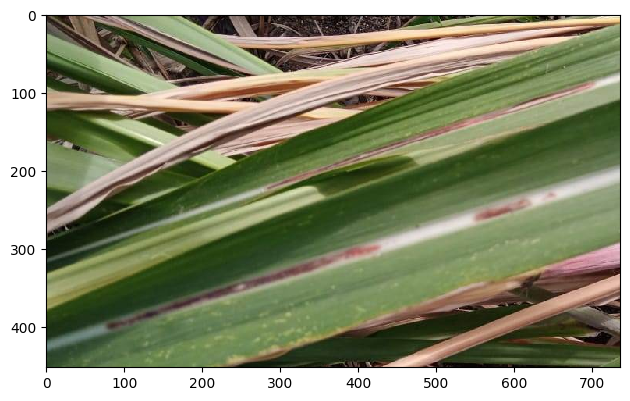

In [17]:
og_image = imread('/content/drive/MyDrive/sugarcaneDisease/SugarcaneLeafDiseaseDataset/RedRot/redrot (1).jpeg')
imshow(og_image);


In [18]:
def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image

In [19]:
def convolver_rgb(image, kernel, iterations = 1):
    img_yuv = rgb2yuv(image)
    img_yuv[:,:,0] = multi_convolver(img_yuv[:,:,0], kernel,
                                     iterations)
    final_image = yuv2rgb(img_yuv)
    return final_image

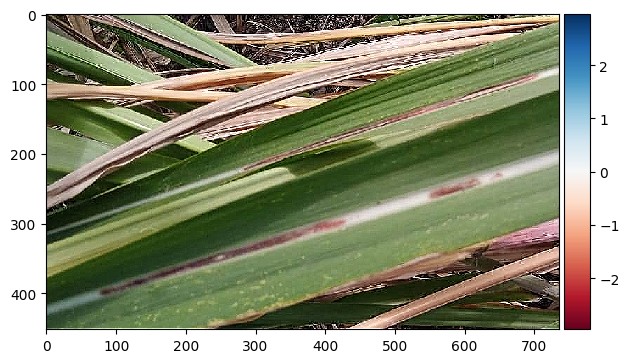

In [20]:
final_image = convolver_rgb(og_image, sharpen, iterations = 1)
imshow(final_image);

In [21]:
from PIL import Image
for i in categories:
    folder_path=os.path.join(data_dir, i) #path to each disease folder
    img_names=os.listdir(folder_path)   #all images in each disease folder
    for img_name in img_names:
        img_path=os.path.join(folder_path, img_name)
        if(img_path=='/content/RedRot_copy/.DS_Store' or img_path=='/content/data/Healthy_copy/.DS_Store' or img_path=='/content/data/Rust_copy/.DS_Store' or img_path=='/content/Mosaic_copy/.DS_Store' or img_path=='/content/Yellow_copy/.DS_Store'):
          continue
        img = Image.open(img_path)
        img = img.resize((224,224))
        img = np.array(img)
        img = convolver_rgb(img, sharpen, iterations = 1)
        data_list.append(img)
        labels_list.append(label_dict[i])

In [22]:
data_list[0].shape

(224, 224, 3)

In [23]:
lb = LabelEncoder()
labels_list = lb.fit_transform(labels_list)
labels_list = to_categorical(labels_list)


In [24]:
data = np.array(data_list)
labels = np.array(labels_list)
print("Done")
print(data.shape)

Done
(2521, 224, 224, 3)


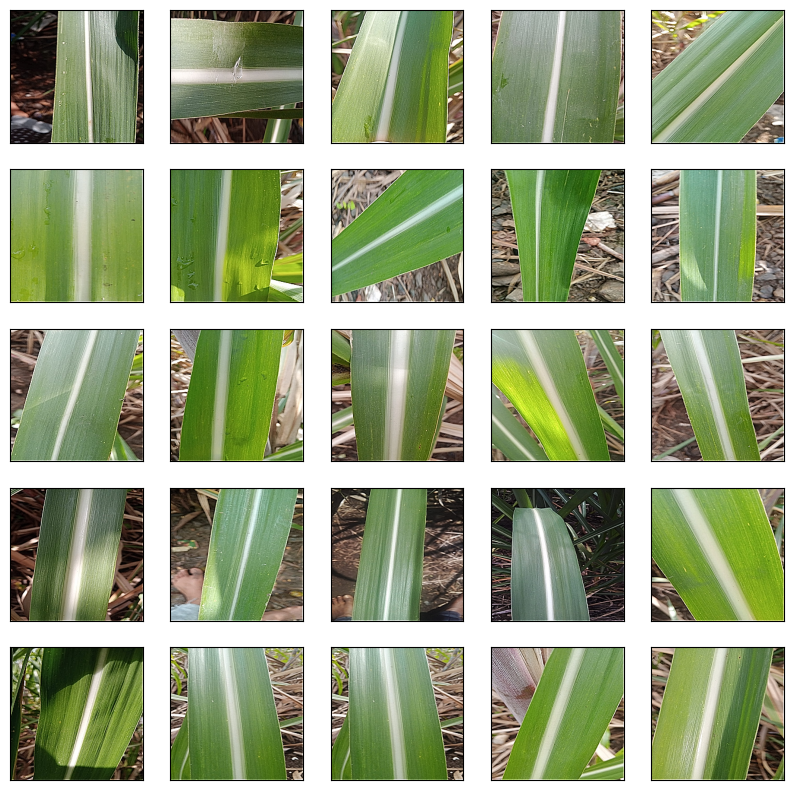

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[np.random.randint(224)], cmap=plt.cm.binary)

plt.show()

In [26]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [27]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [28]:
print( trainX.shape, testX.shape, trainY.shape, testY.shape)

(2016, 224, 224, 3) (505, 224, 224, 3) (2016, 5) (505, 5)


In [29]:
from keras.applications.densenet import DenseNet201
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense ,Dropout
from keras.layers import Input

In [32]:
base_model = DenseNet201(include_top=False,
                         input_shape=(224,224,3),
                         weights='imagenet',
                         pooling="avg"
                     )

74836368/74836368 [==============================] - 0s 0us/step


In [33]:
from tensorflow.keras.regularizers import l2

In [44]:
from tensorflow.keras.regularizers import l2

base_model.trainable = False
image_input = Input(shape=(224, 224, 3))

x = base_model(image_input,training = False)

x = Dense(256,activation = "relu")(x)
x = Dropout(0.2)(x)

x = Dense(128,activation = "relu")(x)
x = Dropout(0.2)(x)

image_output = Dense(5,kernel_regularizer=l2(0.01),activation="softmax")(x)

model = Model(image_input,image_output)
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [45]:
from tensorflow.keras.utils import plot_model
import tensorflow as tf

In [46]:
tf.keras.utils.plot_model(base_model, to_file='Densenet.png', show_shapes=True, show_layer_names=True, rankdir='LR')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [47]:
BS=32
EPOCHS=10

In [48]:


history = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

Epoch 1/10
63/63 [==============================] - 88s 1s/step - loss: 1.1922 - accuracy: 0.5595 - val_loss: 0.9095 - val_accuracy: 0.6752
Epoch 2/10
63/63 [==============================] - 69s 1s/step - loss: 0.7905 - accuracy: 0.7371 - val_loss: 0.5602 - val_accuracy: 0.8059
Epoch 3/10
63/63 [==============================] - 71s 1s/step - loss: 0.6221 - accuracy: 0.7937 - val_loss: 0.4706 - val_accuracy: 0.8297
Epoch 4/10
63/63 [==============================] - 71s 1s/step - loss: 0.5249 - accuracy: 0.8204 - val_loss: 0.4237 - val_accuracy: 0.8733
Epoch 5/10
63/63 [==============================] - 69s 1s/step - loss: 0.4888 - accuracy: 0.8393 - val_loss: 0.4427 - val_accuracy: 0.8475
Epoch 6/10
63/63 [==============================] - 72s 1s/step - loss: 0.4615 - accuracy: 0.8576 - val_loss: 0.4094 - val_accuracy: 0.8653
Epoch 7/10
63/63 [==============================] - 72s 1s/step - loss: 0.4314 - accuracy: 0.8591 - val_loss: 0.3623 - val_accuracy: 0.8832
Epoch 8/10
63/63 [==

In [49]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs))

[INFO] evaluating network...
16/16 [==============================] - 18s 916ms/step
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       105
           1       0.90      0.79      0.84        92
           2       0.90      0.90      0.90       104
           3       0.93      0.96      0.94       103
           4       0.83      0.86      0.84       101

    accuracy                           0.89       505
   macro avg       0.89      0.88      0.88       505
weighted avg       0.89      0.89      0.88       505



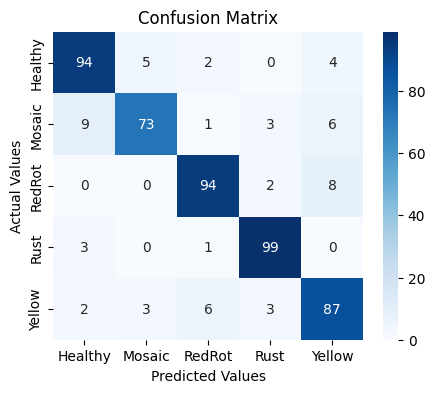

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cm = confusion_matrix(testY.argmax(axis=1), predIdxs)

cm_df = pd.DataFrame(cm,
                     index = ['Healthy','Mosaic','RedRot','Rust','Yellow'],
                     columns = ['Healthy','Mosaic','RedRot','Rust','Yellow'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

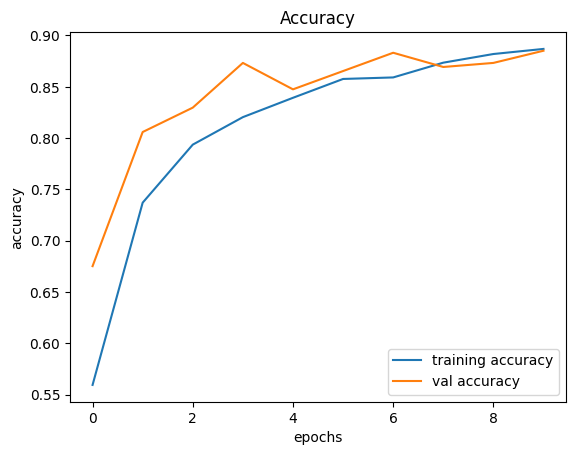

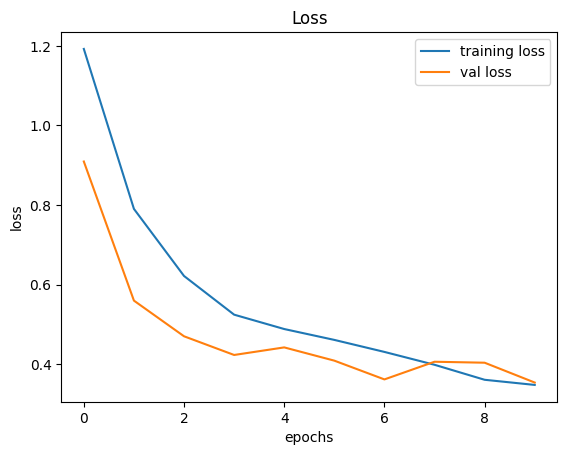

In [53]:
import matplotlib.pyplot as plt
plt.figure(0)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [61]:
from keras.preprocessing import image

img = image.load_img("/content/drive/MyDrive/sugarcaneDisease/SugarcaneLeafDiseaseDataset/RedRot/redrot (1).jpeg", target_size=(224,224))
x = image.img_to_array(img)
x=x/255
img = convolver_rgb(img, sharpen, iterations = 1)
x=x.reshape(224,224,3)
x = np.expand_dims(x, axis=0)


predi=model.predict(x)
print(predi)
classes_x=np.argmax(predi)
print(classes_x)

classes=["Healthy","Mosaic", "RedRot","Rust", "yellow"]
prediction_label=prediction_label=classes[classes_x]
if(prediction_label=="Healthy"):
  print("It is a Healthy Leaf")
else:
  print("Disease detected: "+prediction_label)

1/1 [==============================] - 0s 135ms/step
[[1.29982955e-05 7.40555261e-05 9.47317481e-01 4.62999493e-02
  6.29553944e-03]]
2
Disease detected: RedRot


In [62]:
model.save("DenseNetSVM_Model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
